<a href="https://colab.research.google.com/github/RishiNandhan/Predicting-the-critical-temperature-of-Superconductors/blob/master/SuperConductors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import keras.models
from keras.layers import *
from sklearn import tree


Using TensorFlow backend.


In [2]:
#read the data
data=pd.read_csv("train.csv")
print("\nThe dimensions before pre-processing:",data.shape)




The dimensions before pre-processing: (21263, 82)


In [3]:
#Pre-processing steps
#get the info of the data
print("\nThe info of the data:\n",data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
number_of_elements                 21263 non-null int64
mean_atomic_mass                   21263 non-null float64
wtd_mean_atomic_mass               21263 non-null float64
gmean_atomic_mass                  21263 non-null float64
wtd_gmean_atomic_mass              21263 non-null float64
entropy_atomic_mass                21263 non-null float64
wtd_entropy_atomic_mass            21263 non-null float64
range_atomic_mass                  21263 non-null float64
wtd_range_atomic_mass              21263 non-null float64
std_atomic_mass                    21263 non-null float64
wtd_std_atomic_mass                21263 non-null float64
mean_fie                           21263 non-null float64
wtd_mean_fie                       21263 non-null float64
gmean_fie                          21263 non-null float64
wtd_gmean_fie                      21263 non-null float64
entropy_fie            

In [4]:
#get a statistical description of the data
print("\nThe description of the data:\n",data.describe())



The description of the data:
        number_of_elements  mean_atomic_mass  ...  wtd_std_Valence  critical_temp
count        21263.000000      21263.000000  ...     21263.000000   21263.000000
mean             4.115224         87.557631  ...         0.673987      34.421219
std              1.439295         29.676497  ...         0.455580      34.254362
min              1.000000          6.941000  ...         0.000000       0.000210
25%              3.000000         72.458076  ...         0.306892       5.365000
50%              4.000000         84.922750  ...         0.500000      20.000000
75%              5.000000        100.404410  ...         1.020436      63.000000
max              9.000000        208.980400  ...         3.000000     185.000000

[8 rows x 82 columns]


In [5]:
#Count the number of values in each column
print("\nThe number of values in each column:\n",data.count())



The number of values in each column:
 number_of_elements       21263
mean_atomic_mass         21263
wtd_mean_atomic_mass     21263
gmean_atomic_mass        21263
wtd_gmean_atomic_mass    21263
                         ...  
range_Valence            21263
wtd_range_Valence        21263
std_Valence              21263
wtd_std_Valence          21263
critical_temp            21263
Length: 82, dtype: int64


In [6]:
#count the number of NA values in each column and sort them in descending order
print("\n The number of NA values in each column:\n",data.isna().sum().sort_values(ascending=False))



 The number of NA values in each column:
 critical_temp              0
wtd_std_fie                0
wtd_mean_atomic_radius     0
gmean_atomic_radius        0
wtd_gmean_atomic_radius    0
                          ..
entropy_FusionHeat         0
wtd_entropy_FusionHeat     0
range_FusionHeat           0
wtd_range_FusionHeat       0
number_of_elements         0
Length: 82, dtype: int64


In [7]:
#Count the number of null values and sort them in descending order
print("\nThe number of null values:\n",data.isnull().sum().sort_values(ascending=False))



The number of null values:
 critical_temp              0
wtd_std_fie                0
wtd_mean_atomic_radius     0
gmean_atomic_radius        0
wtd_gmean_atomic_radius    0
                          ..
entropy_FusionHeat         0
wtd_entropy_FusionHeat     0
range_FusionHeat           0
wtd_range_FusionHeat       0
number_of_elements         0
Length: 82, dtype: int64


In [8]:
#Since the number of elements is a category type change this variable to category.
data['number_of_elements']=data['number_of_elements'].astype("category")
print(data['number_of_elements'].value_counts())


5    5792
4    4496
3    3895
2    3280
6    2666
7     774
1     285
8      61
9      14
Name: number_of_elements, dtype: int64


In [9]:
#Check for duplicated rows
print("\nNumber of duplicated rows:\n",data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(data.info())



Number of duplicated rows:
 66
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21262
Data columns (total 82 columns):
number_of_elements                 21197 non-null category
mean_atomic_mass                   21197 non-null float64
wtd_mean_atomic_mass               21197 non-null float64
gmean_atomic_mass                  21197 non-null float64
wtd_gmean_atomic_mass              21197 non-null float64
entropy_atomic_mass                21197 non-null float64
wtd_entropy_atomic_mass            21197 non-null float64
range_atomic_mass                  21197 non-null float64
wtd_range_atomic_mass              21197 non-null float64
std_atomic_mass                    21197 non-null float64
wtd_std_atomic_mass                21197 non-null float64
mean_fie                           21197 non-null float64
wtd_mean_fie                       21197 non-null float64
gmean_fie                          21197 non-null float64
wtd_gmean_fie                      21197 non-n

In [0]:
#create multiple dataframe which contains atomic_mass, fie, atomic_radius,_density,fusion,thermal_conductivity and valence in seperate dataframe
data_atomic_mass=data.iloc[:,1:11]
data_fie=data.iloc[:,11:21]
data_atomic_radius=data.iloc[:,21:31]
data_density=data.iloc[:,31:41]
data_electron_affinity=data.iloc[:,41:51]
data_fusion_heat=data.iloc[:,51:61]
data_thermal_conductivity=data.iloc[:,61:71]
data_valence=data.iloc[:,71:81]


In [0]:

#find the correlation and plot it using a heatmap
corr_atomic_mass=data_atomic_mass.corr()
corr_fie=data_fie.corr()
corr_atomic_radius=data_atomic_radius.corr()
corr_density=data_density.corr()
corr_electron_affinity=data_electron_affinity.corr()
corr_fusion_heat=data_fusion_heat.corr()
corr_thermal_conductivity=data_thermal_conductivity.corr()
corr_valence=data_valence.corr()


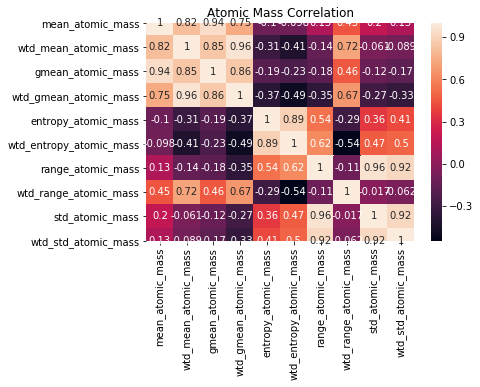

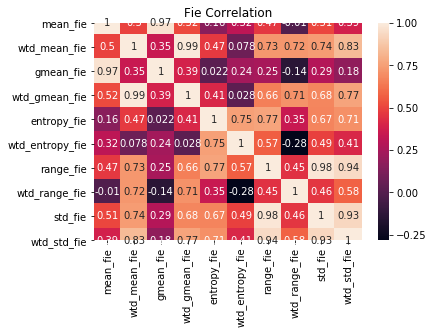

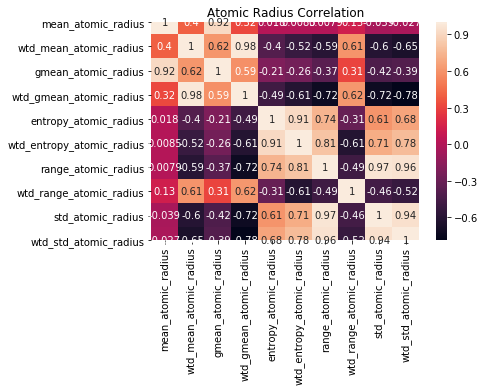

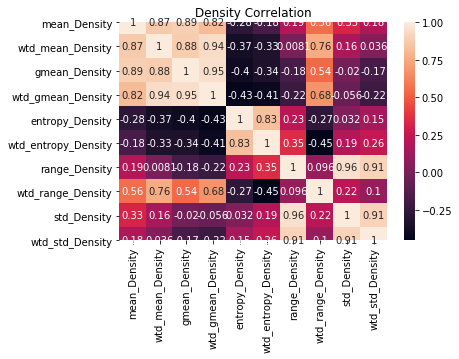

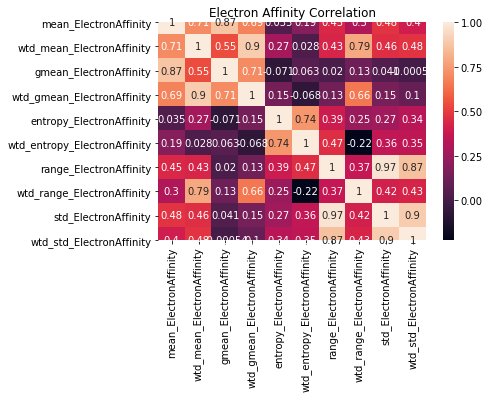

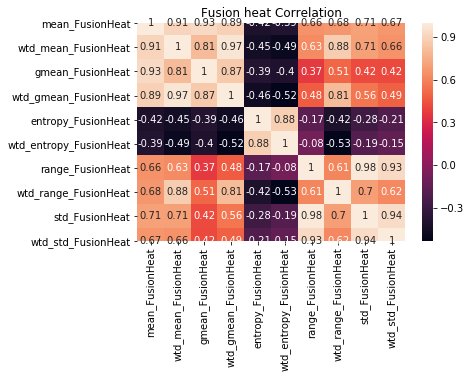

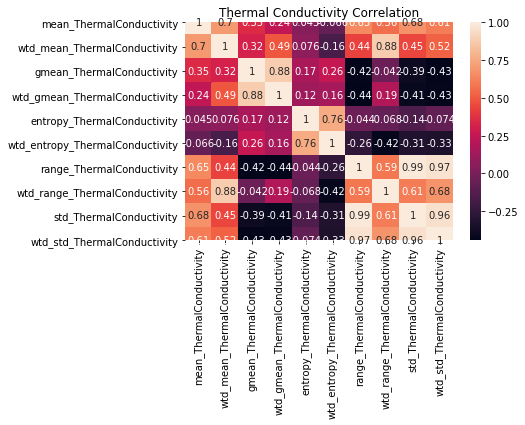

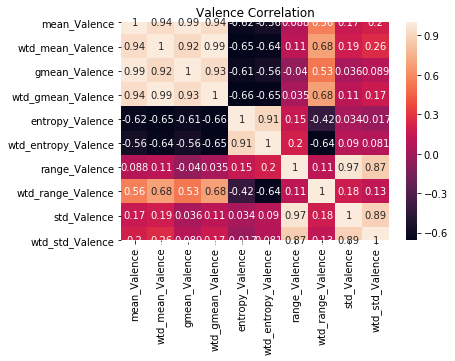

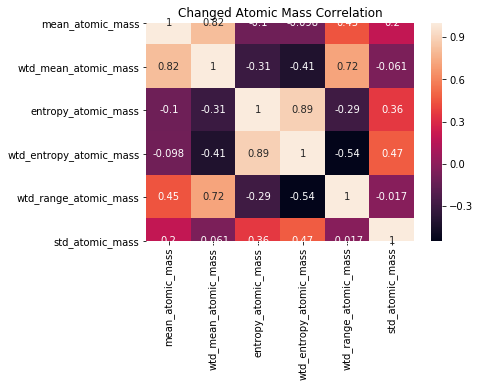

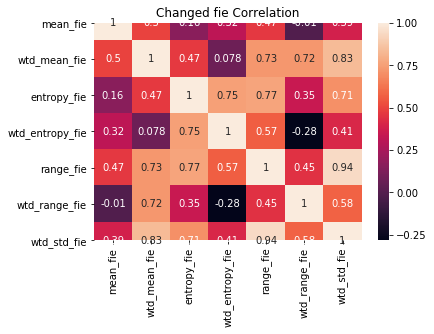

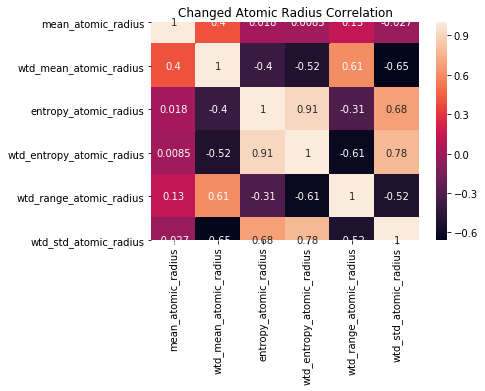

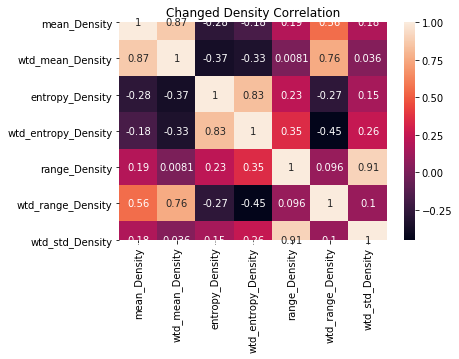

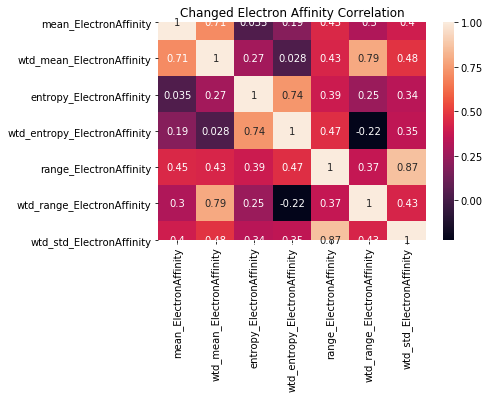

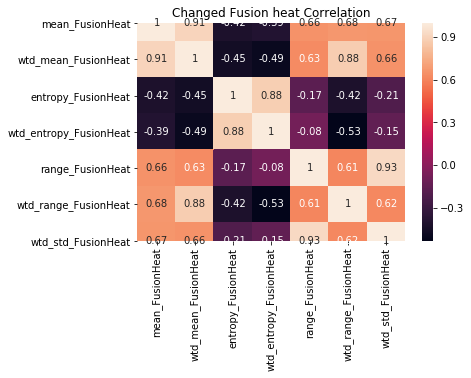

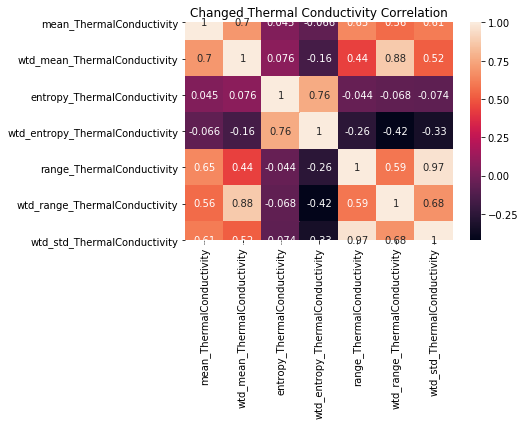

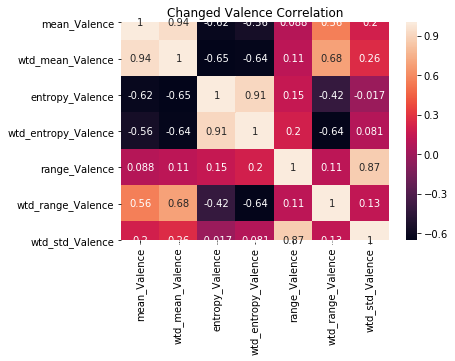

In [12]:
#plot the heatmap for correlation

sns.heatmap(corr_atomic_mass,annot=True)
plt.title("Atomic Mass Correlation")
data_atomic_mass.drop(['gmean_atomic_mass','range_atomic_mass','wtd_std_atomic_mass','wtd_gmean_atomic_mass'],axis=1,inplace=True)
plt.show()
sns.heatmap(corr_fie,annot=True)
plt.title("Fie Correlation")
data_fie.drop(['gmean_fie','wtd_gmean_fie','std_fie'],axis=1,inplace=True)
plt.show()
sns.heatmap(corr_atomic_radius,annot=True)
plt.title("Atomic Radius Correlation")
data_atomic_radius.drop(['gmean_atomic_radius','wtd_gmean_atomic_radius','range_atomic_radius','std_atomic_radius'],axis=1,inplace=True)
plt.show()
sns.heatmap(corr_density,annot=True)
plt.title("Density Correlation")
data_density.drop(['gmean_Density','wtd_gmean_Density','std_Density'],axis=1,inplace=True)
plt.show()
sns.heatmap(corr_electron_affinity,annot=True)
plt.title("Electron Affinity Correlation")
data_electron_affinity.drop(['gmean_ElectronAffinity','wtd_gmean_ElectronAffinity','std_ElectronAffinity'],axis=1,inplace=True)
plt.show()
sns.heatmap(corr_fusion_heat,annot=True)
plt.title("Fusion heat Correlation")
data_fusion_heat.drop(['gmean_FusionHeat','wtd_gmean_FusionHeat','std_FusionHeat'],axis=1,inplace=True)
plt.show()
sns.heatmap(corr_thermal_conductivity,annot=True)
plt.title("Thermal Conductivity Correlation")
data_thermal_conductivity.drop(['gmean_ThermalConductivity','wtd_gmean_ThermalConductivity','std_ThermalConductivity'],axis=1,inplace=True)
plt.show()
sns.heatmap(corr_valence,annot=True)
plt.title("Valence Correlation")
data_valence.drop(['gmean_Valence','wtd_gmean_Valence','std_Valence'],axis=1,inplace=True)
plt.show()
#remove the correlated variable and plot the heatmap to check
sns.heatmap(data_atomic_mass.corr(),annot=True)
plt.title("Changed Atomic Mass Correlation")
plt.show()
sns.heatmap(data_fie.corr(),annot=True)
plt.title("Changed fie Correlation")
plt.show()
sns.heatmap(data_atomic_radius.corr(),annot=True)
plt.title("Changed Atomic Radius Correlation")
plt.show()
sns.heatmap(data_density.corr(),annot=True)
plt.title("Changed Density Correlation")
plt.show()
sns.heatmap(data_electron_affinity.corr(),annot=True)
plt.title("Changed Electron Affinity Correlation")
plt.show()
sns.heatmap(data_fusion_heat.corr(),annot=True)
plt.title("Changed Fusion heat Correlation")
plt.show()
sns.heatmap(data_thermal_conductivity.corr(),annot=True)
plt.title("Changed Thermal Conductivity Correlation")
plt.show()
sns.heatmap(data_valence.corr(),annot=True)
plt.title("Changed Valence Correlation")
plt.show()
data.drop(['gmean_atomic_mass','range_atomic_mass','wtd_std_atomic_mass','wtd_gmean_atomic_mass',
           'gmean_fie','wtd_gmean_fie','std_fie',
           'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'range_atomic_radius', 'std_atomic_radius',
           'gmean_Density', 'wtd_gmean_Density', 'std_Density',
           'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'std_ElectronAffinity',
           'gmean_FusionHeat', 'wtd_gmean_FusionHeat', 'std_FusionHeat',
           'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity', 'std_ThermalConductivity',
           'gmean_Valence', 'wtd_gmean_Valence', 'std_Valence'],axis=1,inplace=True)


In [13]:
#get dummies
data_dummies=pd.get_dummies(data,drop_first=True)
#shape of the data
print("\nThe dimensions after pre-processing:",data_dummies.shape)



The dimensions after pre-processing: (21197, 63)


In [14]:
#seperate the predictors from the response variables
X=data_dummies.drop(['critical_temp'],axis=1)
feature_name=X.columns
print(feature_name)
Y=data_dummies['critical_temp']


Index(['mean_atomic_mass', 'wtd_mean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass',
       'mean_fie', 'wtd_mean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'wtd_std_fie', 'mean_atomic_radius',
       'wtd_mean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'wtd_range_atomic_radius',
       'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density',
       'entropy_Density', 'wtd_entropy_Density', 'range_Density',
       'wtd_range_Density', 'wtd_std_Density', 'mean_ElectronAffinity',
       'wtd_mean_ElectronAffinity', 'entropy_ElectronAffinity',
       'wtd_entropy_ElectronAffinity', 'range_ElectronAffinity',
       'wtd_range_ElectronAffinity', 'wtd_std_ElectronAffinity',
       'mean_FusionHeat', 'wtd_mean_FusionHeat', 'entropy_FusionHeat',
       'wtd_entropy_FusionHeat', 'range_FusionHeat', 'wtd_range_FusionHeat',
       'wtd_std_FusionHeat', 'mean_T

In [0]:
#split the data into training and test batches
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=21)


In [16]:
#normalize the data
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
print(type(scaled_X_train))
print(scaled_X_train.shape)


<class 'numpy.ndarray'>
(14837, 62)


In [17]:
#Use PCA to reduce dimensions
pca=PCA(0.90)
train_data=pca.fit_transform(scaled_X_train)
test_data=pca.transform(scaled_X_test)

print("The explained variance ratios are:\n",pca.explained_variance_ratio_)
print("\nThe total variance in the data is :",pca.explained_variance_ratio_.sum())
print("\nThe number of components:",pca.n_components_)


The explained variance ratios are:
 [0.34921542 0.10008556 0.08741908 0.06647482 0.05550205 0.04075699
 0.03220382 0.02700946 0.02295875 0.02048192 0.01927944 0.0170936
 0.01638027 0.0162347  0.01601055 0.01481478]

The total variance in the data is : 0.9019211986081621

The number of components: 16


In [18]:
#Linear regression
linear_model=LinearRegression()
linear_model.fit(train_data,Y_train)
Y_predicted=linear_model.predict(test_data)
print(Y_test.iloc[5:15,])
print(Y_predicted[5:15])

print("The intercept :",linear_model.intercept_)
print("\n The co-efficient are:\n",linear_model.coef_)
mse=mean_squared_error(Y_test,Y_predicted)
rmse=np.sqrt(mse)
print("The RMSE is :",rmse)
print("The R2 score:",r2_score(Y_test,Y_predicted))


11259     17.700
10893      3.660
15837      4.740
16377     10.591
12193     16.000
14246      4.800
19615      3.400
976      110.000
13390      6.000
14619      6.420
Name: critical_temp, dtype: float64
[ 5.73176891  2.37607686 -5.79460687  9.90827359 18.99280643 20.59489829
  7.04072485 71.12240047 10.43571241 11.49861313]
The intercept : 34.290401399541686

 The co-efficient are:
 [-4.77852798  2.51801546 -3.21516765 -1.7978256   2.4547249   3.37094374
  0.21772612  0.67516571  0.23310621 -1.0152341   2.34409511  0.66858575
 -0.49077427  0.54405451 -0.39663164  3.63723435]
The RMSE is : 22.121219382338197
The R2 score: 0.588413359123279


In [19]:
#Neural network model
NN=keras.models.Sequential()
NN.add(Dense(30,input_dim=16,activation="relu"))
NN.add(Dense(60,activation="relu"))
NN.add(Dense(1,activation="linear"))
NN.compile(optimizer='adam',loss='mean_squared_error')
print(NN.summary())
NN.fit(train_data,Y_train,epochs=100,batch_size=50,verbose=2)
print("Evaluation started..........................")
NN_predicted=NN.evaluate(x=test_data,y=Y_test,verbose=1)
print("The RMSE of NN is:",np.sqrt(NN_predicted))






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                1860      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 2,431
Trainable params: 2,431
Non-trainable params: 0
_________________________________________________________________
None



Epoch 1/100





 - 5s - loss: 881.1599
Epoch 2/100
 - 1s - loss: 363.4489
Epoch 3/100
 - 1s - loss: 316.9140
Epoch 4/100
 - 1s - loss: 293.9994
Epoch 5/100
 - 1s - loss: 282.5550
Epoch 6/100
 - 1s - loss: 275.5276
Epoch 7/100
 - 1s - loss: 270.9103
Epoch 8/100
 - 1s - loss: 267.0228
Epoch 9/100
 - 1s - loss: 263.8060
Epoch 10/100
 - 1s - loss: 260.8313
Epoch 11/100
 

In [20]:
#Grid Search CV for Random Forest regressor
rf_cv=RandomForestRegressor(verbose=1)
params={'n_estimators':[50,100],
        'max_depth':[5,7,10]}
gs_cv=GridSearchCV(rf_cv,params,cv=5)
gs_cv.fit(train_data,Y_train)
print("Best params:",gs_cv.best_params_)
print("Best score",gs_cv.best_score_)
print("Best estimator",gs_cv.best_estimator_)
grid_results=pd.DataFrame(gs_cv.cv_results_)
print("CV Results",grid_results)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best params: {'max_depth': 10, 'n_estimators': 100}
Best score 0.8496890676107668
Best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=1, warm_start=False)
CV Results    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       4.151102      0.017696  ...        0.009411                6
1       8.379385      0.071819  ...        0.008774                5
2       5.505838      0.047297  ...        0.007579                4
3      10.931063      0.058776  ...        0.007974                3
4       7.261798      0.049304  ...        0.006815                2
5      13.724029

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.8s finished


In [21]:
#Random Forest regressor
random_forest=RandomForestRegressor(n_estimators=100,oob_score=True,random_state=21,verbose=1,max_depth=10)
random_forest.fit(train_data,Y_train)
RF_predicted=random_forest.predict(test_data)
RF_RMSE=np.sqrt(mean_squared_error(Y_test,RF_predicted))
print("THE RMSE OF RF IS:",RF_RMSE)
print("The oob score:",random_forest.oob_score_)
print("\nThe important variables\n",random_forest.feature_importances_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


THE RMSE OF RF IS: 13.122861116565373
The oob score: 0.8501607165410069

The important variables
 [0.62803018 0.01119339 0.02465621 0.01964875 0.08647929 0.08944569
 0.01219816 0.02389283 0.01037832 0.015089   0.03051925 0.01479963
 0.00422096 0.00902456 0.00973313 0.01069066]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
